In [1]:
# Các thư viện cần thiết
import numpy as np
import pandas as pd
import random
from scipy import stats
from statsmodels.stats.weightstats import ttest_ind
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
%matplotlib inline

In [2]:
# Thiết lập định dạng hình ảnh
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

In [3]:
#Tắt các cảnh báo của scipy
warnings.filterwarnings('ignore')

In [4]:
#Sinh ngẫu nhiên 25 mẫu tuân theo phân phối chuẩn có trung bình mẫu là 1 và độ lệch chuẩn là 0.1
mean = 1
std = 0.1
N = 25
samples = np.random.normal(mean, std, N)

In [5]:
#In ra 10 phần tử đầu tiên
print(samples[:10])

[0.95085156 1.14118838 1.04369912 0.93591203 1.05122215 1.04409144
 1.08069198 0.95652473 0.91796058 1.04736374]


In [6]:
#In ra các giá trị max, min của samples
print('Max: ', max(samples))
print('Min: ', min(samples))

Max:  1.2085677061020192
Min:  0.9064025340488244


In [7]:
# Hàm vẽ histogram của mẫu
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="r", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

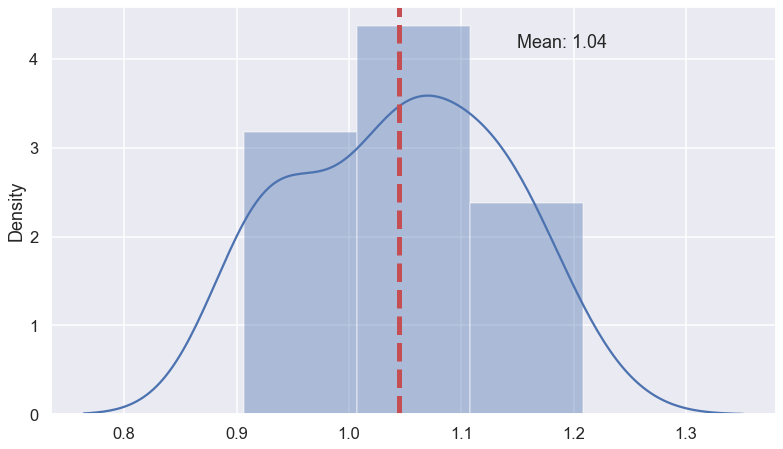

In [8]:
#Vẽ histogram của mẫu mới sinh ra ( có đường phân phối chuẩn và số mean)
plot_distribution(samples)

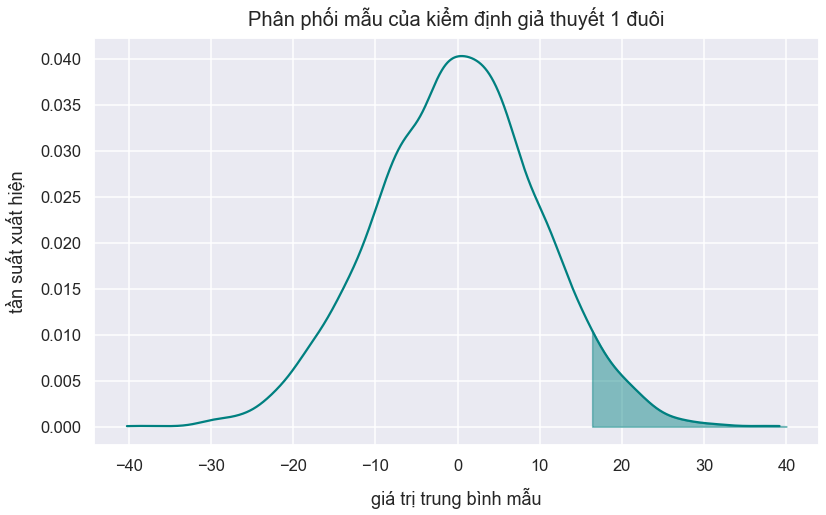

In [9]:
#Sinh ngẫu nhiên 6000 mẫu theo phân phối chuẩn có mean = 0 và std = 10
samples = np.random.normal(loc=0, scale=10, size=6000)
#Minh họa một đuôi và mức alpha = 0.05
two_std_from_mean = np.mean(samples) + np.std(samples)*1.645
#kernel density
kde = stats.gaussian_kde(samples)
#Trả về 10000 giá trị phân bố bằng nhau trong khoảng từ min tới max của samples 
pos = np.linspace(np.min(samples), np.max(samples), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(two_std_from_mean, 40, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal')
plt.title("Phân phối mẫu của kiểm định giả thuyết 1 đuôi", y=1.015, fontsize=20)
plt.xlabel("giá trị trung bình mẫu", labelpad=14)
plt.ylabel("tần suất xuất hiện", labelpad=14);


In [10]:
# Sử dụng hình minh họa
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://media.geeksforgeeks.org/wp-content/uploads/20201028032933/Screenshot37.png", width=300, height=300)

In [11]:
Image(url= "https://media.geeksforgeeks.org/wp-content/uploads/20201028032937/Screenshot39.png", width=300, height=300)

In [12]:
Image(url= "https://media.geeksforgeeks.org/wp-content/uploads/20201028032935/Screenshot38.png", width=300, height=300)

In [13]:
#Sinh ngẫu nhiên một mẫu 25 phần tử có trung bình mẫu là 138.47, độ lệch chuẩn là 2.66
we = np.random.normal(138.47, 2.66, 20)
print(samples[:10])


[ -1.2157328   -1.77257892   3.37665552 -12.97229176  18.8387062
  10.13106655 -11.42384536  -1.95471532 -13.96437596  10.17933147]


In [14]:
#Xác định các thông số
alpha = 0.05


T test one tailed for one sample
Is the average capacity of batteries less than 140 ampere-hours? A random sample of 20 batteries had a mean of 138.47 and a standard deviation of 2.66. Assume a normal distribution. Test at the .05 level of significance. One-Tailed t Test Solution

One-Tailed t Test Solution H0: μ = 140

Ha: μ < 140

α = .05

df =20 – 1 = 19

Critical Value(s):

Test Statistic: Hệ số sig = 0.05 Chỉ số t tương ứng với hệ số sig ở trên là -1.729 t = ( x̄ – μ) / (s / √n) Áp dụng với các giá trị nêu trên:

X¯¯¯¯ = 138.47 μ = 140 σ = 2.66 α = 0.05 df = 20 - 1 t = -2.57 Giá trị t = -2.57 < -1.729 nên có bằng chứng để bác bỏ giả thuyết H0.

In [15]:
#Kiểm định t one sample
ttest_Score, p_value = st.ttest_1samp(we, 140)
print('t = ',ttest_Score,', p = ',p_value)
if(p_value <  alpha):
  print("Có bằng chứng để bác bỏ giả thuyết H0")
else:
  print("Chưa có bằng chứng để bác bỏ giả thuyết H0")

t =  -1.7395714104042062 , p =  0.09810936008836071
Chưa có bằng chứng để bác bỏ giả thuyết H0



# T test one tailed for two samples
                         Small-Sample Test
Example

You’re a financial analyst for Charles Schwab. Is there a difference in dividend yield between stocks listed on the NYSE and NASDAQ? You collect the following data:

          NYSE               NASDAQ
Number     11                  15

Mean      3.27                2.53

Std Dev  1.30                 1.16

Assuming normal populations, And population variances are equal is there a difference in average yield (α = .05)?

H0 : μ1 – μ2 = 0 (μ1 = μ2)

Ha : μ1 – μ2 ≠ 0 (μ1 ≠ μ2)

α = .05

df = 11 + 15 – 2 = 24

Critical Value(s): 
 Hệ số sig = 0.05
Chỉ số t tương ứng với hệ số sig ở trên là +2.064 và -2.064

Áp dụng với các giá trị vào công thức tính t - score cho mẫu đa, ta có:


t = 1.53

Giá trị t = 1.53 < 2.064 nên không đủ bằng chứng để bác bỏ giả thuyết  H0.
.

In [16]:
#Lập trình python minh họa
#Sinh ngẫu nhiên NYSE có 11 phần tử với mean = 3.27 std = 1.3
NYSE = np.random.normal(3.27, 1.3, 11)
print(NYSE[:10])

[2.96740294 5.42620173 2.9058596  1.89911192 3.34121558 5.62391585
 2.30978339 4.71399462 3.79727788 1.69885536]


In [17]:
#Sinh ngẫu nhiên  NASDAQ có 15 phần tử với mean = 2.53 std = 1.16
NASDAQ = np.random.normal(2.53, 1.16, 15)
print(NASDAQ[:10])

[2.91830472 2.79561642 3.4679395  1.52134622 1.77613066 2.03912075
 2.09438931 3.62335883 0.62938433 1.14737198]


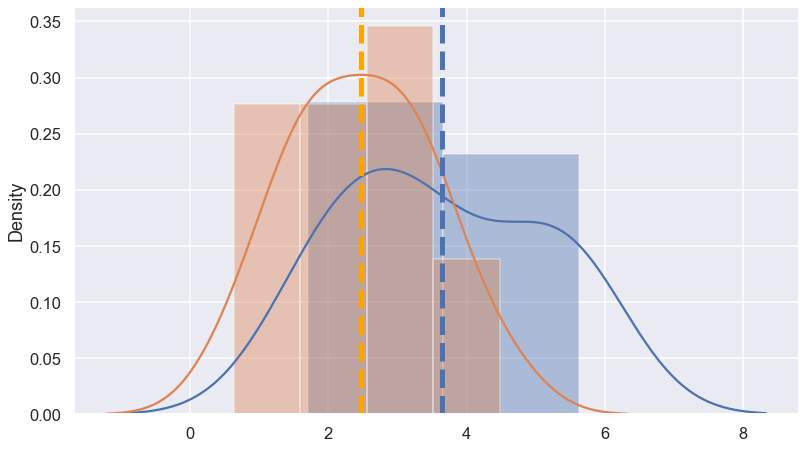

In [18]:
# Vẽ biểu đồ của 2 mẫu mới sinh

plt.figure()
ax1 = sns.distplot(NYSE)
ax2 = sns.distplot(NASDAQ)
plt.axvline(np.mean(NYSE), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(NASDAQ), color='orange', linestyle='dashed', linewidth=5)

In [19]:
#Kiểm định giả thuyết 
alpha = 0.05
ttest_score, p_value = stats.ttest_ind(NYSE, NASDAQ)
print('t = ', ttest_score, '; p = ', p_value)
if(p_value <  alpha/2):
  print("Có bằng chứng để bác bỏ giả thuyết H0")
else:
  print("Chưa có bằng chứng để bác bỏ giả thuyết H0")

t =  2.4014709259185425 ; p =  0.024431078278115918
Có bằng chứng để bác bỏ giả thuyết H0
